<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°071


<a id='p1'></a>
## I.- Problema 01


<img src="https://plus.unsplash.com/premium_photo-1661963439471-0d0eeb1330d4?fm=jpg&q=60&w=3000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y2FsaWZvcm5pYSUyMGhvdXNlfGVufDB8fDB8fHww" width = "400" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [3]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# FIXME

1. Definicion del problema :  El objetivo de este análisis es predecir el valor medio de las propiedades en areas diferentes utilizando las características proporcionadas. La finalidad es encontrar variables que influyan en la prediccion de los distintos modelos en el valor de las viviendas, para ello se utilizaran modelos de regresion , se compararan y se indentificará el mejor a partir de las metricas de error.

2. Estadistica descriptiva :

In [4]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


3. Visualizacion Descriptiva:  Utilizar gráficos para explorar los datos y sus relaciones.

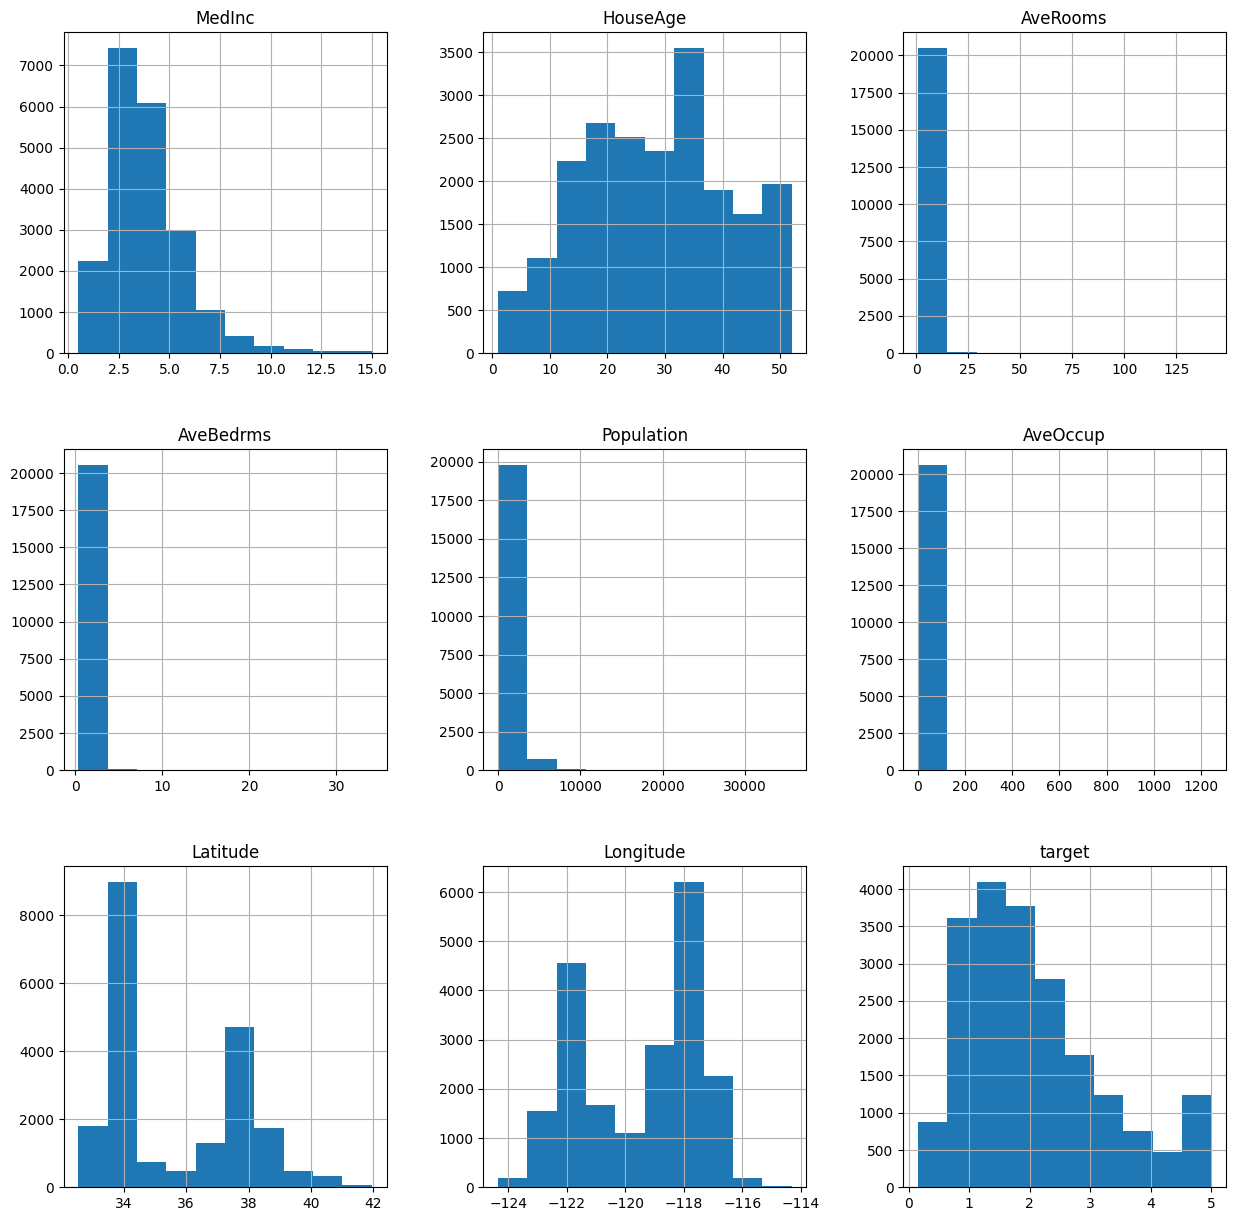

In [5]:
# Grafico las distrbuciones de cada variable
housing.hist(figsize=(15, 15))
plt.show()

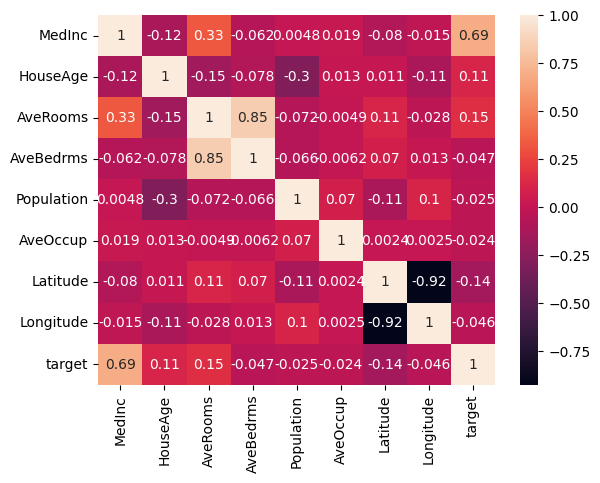

In [6]:
sns.heatmap(housing.corr(), annot=True)
plt.show()

mayor valor del heat map se encuentra en la relacion target-medInc

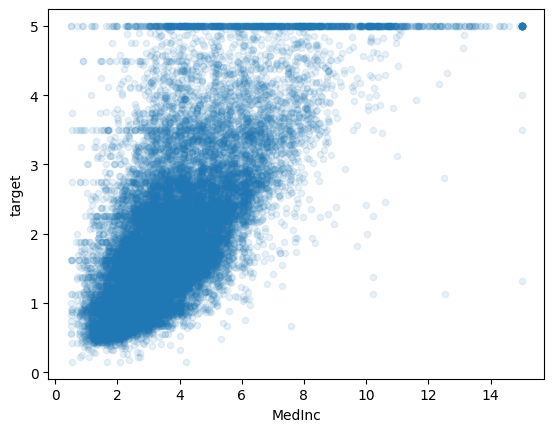

In [7]:
#relacion target-medInc
housing.plot(kind='scatter', x="MedInc", y="target", alpha=0.1)
plt.show()

4. Preprocesamiento: Realizar los pasos necesarios de limpieza y transformación de los datos.

In [8]:
#limpieza y transformacion de datos
#comprobar si faltan valores
housing.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


no faltan valores.

In [10]:
from sklearn.preprocessing import StandardScaler


columnanu = housing.select_dtypes(include=['float64', 'int64']).columns
housing[columnanu] = StandardScaler().fit_transform(housing[columnanu]) #normalizACION DE COLUMNAS NUMERICAS
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900


5 y 6. Selección de modelo (Regresion lineal, arbol de decisiones, K vecinos, Svm) Comparar al menos cuatro modelos de predicción diferentes y Métricas y análisis de resultados


In [43]:

#Generar datos de entrenamiento:
from sklearn.model_selection import train_test_split
X = housing.drop(columns="target")
y = housing["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Modelo 1: Regresión lineal
from sklearn.linear_model import LinearRegression
# Crear una instancia del modelo
model = LinearRegression()
# Entrenar el modelo
model.fit(X_train, y_train)
# Hacer predicciones
y_pred = model.predict(X_test)
# almacenar
y_pred1=y_pred
#Calcular metrica
mse1=mean_squared_error(y_test, y_pred)
mae1=mean_absolute_error(y_test, y_pred)
rmse1 = root_mean_squared_error(y_test, y_pred)
r21=r2_score(y_test, y_pred)

# Modelo 2: Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
# Crear una instancia del modelo
model = DecisionTreeRegressor()
# Entrenar el modelo
model.fit(X_train, y_train)
# Hacer predicciones
y_pred = model.predict(X_test)
# almacenar
y_pred2=y_pred
#calcular metrica
mse2=mean_squared_error(y_test, y_pred)
mae2=mean_absolute_error(y_test, y_pred)
rmse2 = root_mean_squared_error(y_test, y_pred)
r22=r2_score(y_test, y_pred)


#Modelo 3: K vecinos
from sklearn.neighbors import KNeighborsRegressor
# Crear una instancia del modelo
model = KNeighborsRegressor()
# Entrenar el modelo
model.fit(X_train, y_train)
# Hacer predicciones
y_pred = model.predict(X_test)
# almacenar
y_pred3=y_pred
#calcular metrica
mse3=mean_squared_error(y_test, y_pred)
mae3=mean_absolute_error(y_test, y_pred)
rmse3 = root_mean_squared_error(y_test, y_pred)
r23=r2_score(y_test, y_pred)

#Modelo 4: SVM
from sklearn.svm import SVR
# Crear una instancia del modelo
model = SVR()
# Entrenar el modelo
model.fit(X_train, y_train)
# Hacer predicciones
y_pred = model.predict(X_test)
# almacenar
y_pred4=y_pred
#calcular metrica
mse4=mean_squared_error(y_test, y_pred)
mae4=mean_absolute_error(y_test, y_pred)
rmse4 = root_mean_squared_error(y_test, y_pred)
r24=r2_score(y_test, y_pred)


#Crear tabla comparativa
import pandas as pd
# Crear un diccionario con las métricas
resultados = {
    "Modelo": ["Regresión Lineal", "Decision Tree", "K-Neighbors", "SVM"],
    "MSE": [mse1, mse2, mse3, mse4],
    "MAE": [mae1, mae2, mae3, mae4],
    "RMSE": [rmse1, rmse2, rmse3, rmse4],
    "R2": [r21, r22, r23, r24]
}

# Crear un DataFrame a partir del diccionario
df_resultados = pd.DataFrame(resultados)

# Mostrar la tabla
from IPython.display import display
display(df_resultados)




,Modelo,MSE,MAE,RMSE,R2
0,Regresión Lineal,0.389759,0.460864,0.624307,0.599718
1,Decision Tree,0.360951,0.384438,0.600792,0.629303
2,K-Neighbors,0.294666,0.373579,0.542832,0.697378
3,SVM,0.253605,0.339220,0.503592,0.739548


Observando la tabla, se observa que el modelo SVM es que el tiene menor error MSE y mayor R2  lo que indica que el modelo SVM interpreta mejor los datos en comparación con los demás. Regresión Lineal es el modelo con peor rendimiento en esta comparación, el mse es bajo lo que indica un mayor error en las predicciones y El R2 es el más bajo, lo que significa que la Regresión Lineal no es tan efectiva para interpretar la variabilidad de los datos en comparación con los otros modelos.

7. Visualización de resultados del modelo: Crear gráficos que muestren el desempeño de los modelos.

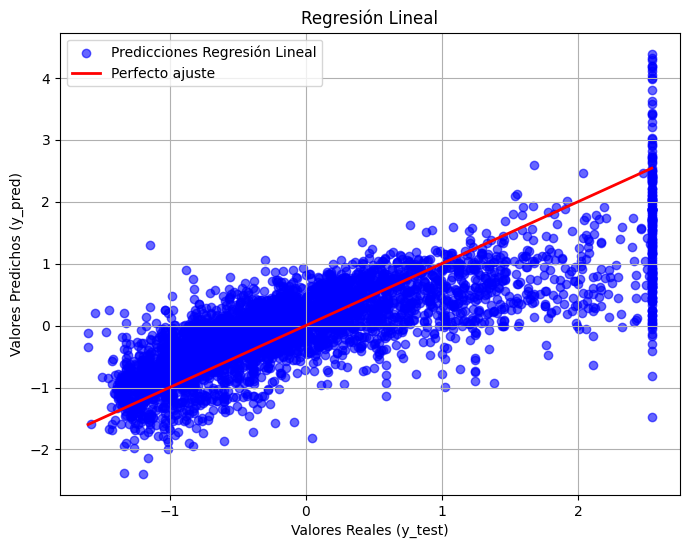

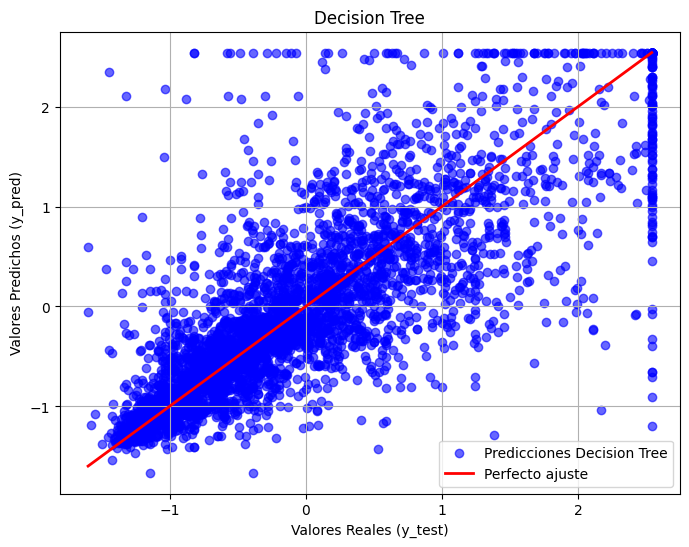

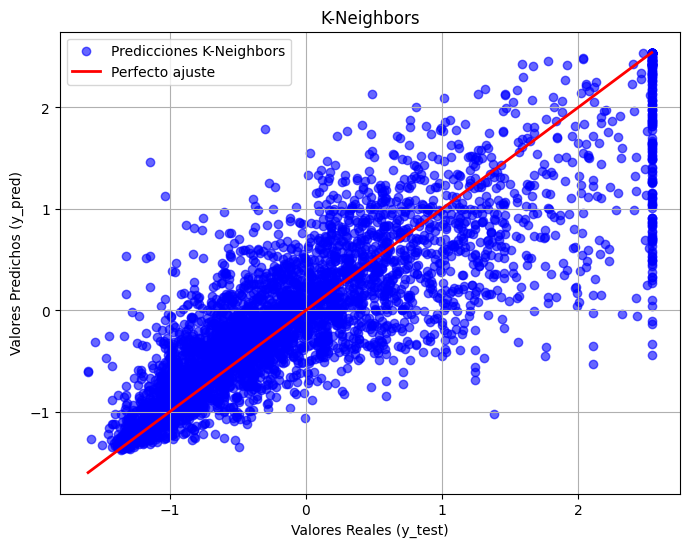

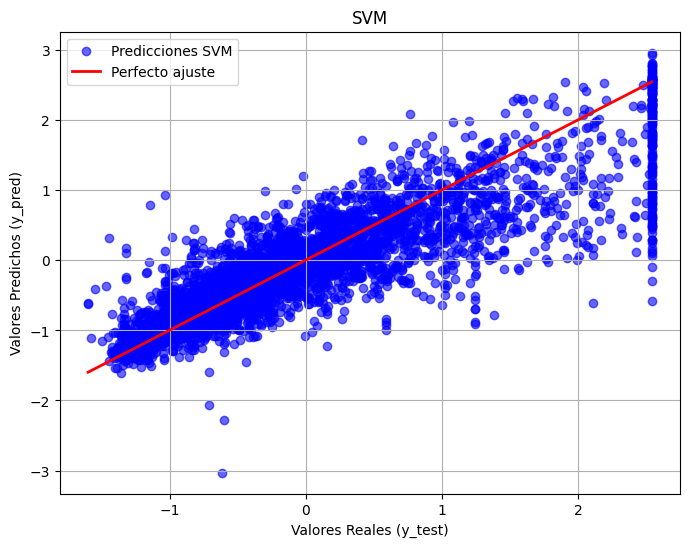

In [44]:
#graficar datos modelos
import matplotlib.pyplot as plt

# Función para crear gráficos de dispersión de los valores testeados vs predichos
def grafico_predicciones(y_test, y_pred, modelo_nombre):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', label=f'Predicciones {modelo_nombre}', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfecto ajuste')
    plt.xlabel('Valores Reales (y_test)')
    plt.ylabel('Valores Predichos (y_pred)')
    plt.title(f'{modelo_nombre}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Crear los gráficos para cada modelo
grafico_predicciones(y_test, y_pred1, 'Regresión Lineal')
grafico_predicciones(y_test, y_pred2, 'Decision Tree')
grafico_predicciones(y_test, y_pred3, 'K-Neighbors')
grafico_predicciones(y_test, y_pred4, 'SVM')

In [ ]:
Se observa que el modelo SVM se ajusta de mejor manera a los datos de testeo.

In [46]:
#Calculo valor medio propiedades
import numpy as np
valor_medio_predicciones = np.mean(y_pred4)
print(f"El valor medio de las propiedades predichas es: {valor_medio_predicciones}")


El valor medio de las propiedades predichas es: -0.09172826859624265


8. Conclusiones: Resumir los hallazgos del análisis.
se probaron 4 modelos para analizar el problema (Regresion lineal, arboles de decision Knn y Support Vector Machines), tras analizar metricas de errores y observar graficos obtenidos, se concluye que el modelo que mejor se comporta al resolver el problema es el de SVM.